In [1]:
import shutil
import os

In [2]:
print(os)

<module 'os' from '/home/shahir/anaconda3/lib/python3.7/os.py'>


In [21]:
data = "../../men-women-classification/data"

In [22]:
men = os.path.join(data , "men")
women = os.path.join(data, 'women')

In [40]:
print( "Men images : " , len(os.listdir(men)))
print( "Women images : " , len(os.listdir(women)))

Men images :  1418
Women images :  1912


In [26]:
base = "data"
os.mkdir(base)

In [29]:
trainDir = os.path.join(base ,"train")
os.mkdir(trainDir)
validDir = os.path.join(base ,"valid")
os.mkdir(validDir)
testDir = os.path.join(base ,"test")
os.mkdir(testDir)

In [30]:
train_men_Dir = os.path.join(trainDir ,"men")
os.mkdir(train_men_Dir)
train_women_Dir = os.path.join(trainDir ,"women")
os.mkdir(train_women_Dir)
valid_men_Dir = os.path.join(validDir ,"men")
os.mkdir(valid_men_Dir)
valid_women_Dir = os.path.join(validDir ,"women")
os.mkdir(valid_women_Dir)
test_men_Dir = os.path.join(testDir ,"men")
os.mkdir(test_men_Dir)
test_women_Dir = os.path.join(testDir ,"women")
os.mkdir(test_women_Dir)

In [48]:
menList = [i for i in os.listdir(men)]
womenList = [i for i in os.listdir(women)]

In [52]:
len(menList),len(womenList)

(1418, 1912)

In [53]:
#copying images from destination folder to train folder for men
fnames = [menList[i] for i in range(800)]
for fname in fnames:
    src = os.path.join(men, fname)
    dst = os.path.join(train_men_Dir, fname)
    shutil.copyfile(src, dst)

In [54]:
#copying images from destination folder to train folder for women
fnames = [womenList[i] for i in range(800)]
for fname in fnames:
    src = os.path.join(women, fname)
    dst = os.path.join(train_women_Dir, fname)
    shutil.copyfile(src, dst)

In [58]:
#copying images from destination folder to validation folder for men
fnames = [menList[i] for i in range(800,1200)]
for fname in fnames:
    src = os.path.join(men,fname)
    dst = os.path.join(valid_men_Dir,fname)
    shutil.copyfile(src,dst)

In [61]:
#copying images from destination folder to validation folder for women
fnames = [womenList[i] for i in range(800,1200)]
for fname in fnames:
    src = os.path.join(women,fname)
    dst = os.path.join(valid_women_Dir,fname)
    shutil.copyfile(src,dst)

In [63]:
#copying images from destination folder to test folder for men
fnames = [menList[i] for i in range(1200,1418)]
for fname in fnames:
    src = os.path.join(men,fname)
    dst = os.path.join(test_men_Dir,fname)
    shutil.copyfile(src,dst)

In [66]:
#copying images from destination folder to test folder for women
fnames = [womenList[i] for i in range(1200,1418)]
for fname in fnames:
    src = os.path.join(women,fname)
    dst = os.path.join(test_women_Dir,fname)
    shutil.copyfile(src,dst)

In [73]:
print("Train men Folder Images:   ",len(os.listdir(train_men_Dir)))
print("Train women Folder Images: ",len(os.listdir(train_women_Dir)))
print("Valid men Folder Images:   ",len(os.listdir(valid_men_Dir)))
print("Train women Folder Images: ",len(os.listdir(valid_women_Dir)))
print("test men Folder Images:   ",len(os.listdir(test_men_Dir)))
print("test women Folder Images:   ",len(os.listdir(test_women_Dir)))

Train men Folder Images:    800
Train women Folder Images:  800
Valid men Folder Images:    400
Train women Folder Images:  400
test men Folder Images:    218
test women Folder Images:    219


In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D , Dense, Dropout , Flatten

In [95]:
model = Sequential()

In [96]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

#Dense Classifier
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(trainDir,
                                                    target_size=(256, 256),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validDir,
                                                    target_size=(256, 256),
                                                    batch_size=20,
                                                    class_mode='binary')


Found 1590 images belonging to 2 classes.
Found 797 images belonging to 2 classes.


In [102]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 256, 256, 3)
labels batch shape: (20,)


In [103]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
80/80 [==============================] - 449s 6s/step - loss: 0.7235 - acc: 0.5245 - val_loss: 0.6920 - val_acc: 0.5270
Epoch 2/5
80/80 [==============================] - 493s 6s/step - loss: 0.6974 - acc: 0.5270 - val_loss: 0.6931 - val_acc: 0.5019
Epoch 3/5
80/80 [==============================] - 479s 6s/step - loss: 0.6930 - acc: 0.5245 - val_loss: 0.6929 - val_acc: 0.5044
Epoch 4/5
80/80 [==============================] - 467s 6s/step - loss: 0.6895 - acc: 0.5245 - val_loss: 0.6982 - val_acc: 0.5207
Epoch 5/5
80/80 [==============================] - 451s 6s/step - loss: 0.6767 - acc: 0.5579 - val_loss: 0.7044 - val_acc: 0.5433


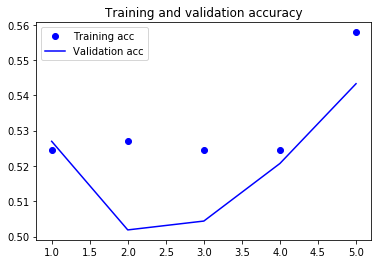

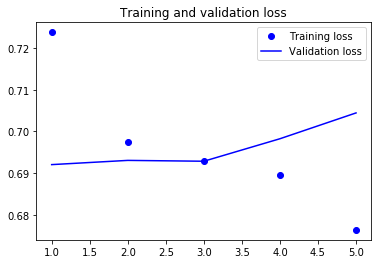

In [105]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [212]:
import PIL.Image as img
import numpy as np
import  matplotlib.pyplot as plt

In [213]:
imgs = []
imgslist = ["girl.jpg","shahirzain.jpg"]
for i in imgslist:
    print(i)
    imgs = img.open(i)
    imgsarr = np.asarray(imgs)

girl.jpg
shahirzain.jpg


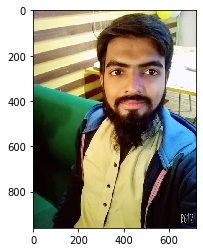

In [203]:
plt.imshow(imgsarr)

In [204]:
img = tf.image.resize(imgs,(256,256))
type(img)

tensorflow.python.framework.ops.Tensor

In [205]:
x = img.eval(session=tf.compat.v1.Session())

In [206]:
x = x.reshape((1,) + x.shape)  

In [207]:
res=model.predict(x)

In [208]:
res

array([[1.]], dtype=float32)